In [4]:
%load_ext autoreload
%autoreload 2

# Data Splitting

In [159]:
import pandas as pd

from src.data.split_data import DataSplitter
from src.data.preprocessing import DataProcessor
from src.features.BOW import BOW
from src.features.TFIDF import TFIDF
from src.models.model_representation import Model

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [11]:
dataSplitter = DataSplitter("../data/raw/cat_6716.xlsx")
# Split the data into train and test dataset
dataSplitter.split_data_train_test()
# Write the splitted data (X_train, X_test, y_train, y_test) into files data/interim
dataSplitter.write_data("../data/interim/")
print("Dataset splitted into X_train, X_test, y_train and y_test")

Dataset splitted into X_train, X_test, y_train and y_test


## Data Previous to Preprocessing



### X_train

In [16]:
X_train = pd.read_csv("../data/interim/X_train_raw.csv")
X_train.head()

,Textos_espanol
0,Las Relaciones Internacionales (RI) y las disc...
1,Las empresas de agua potable cobran una tarifa...
2,"Sin embargo, las exportaciones en 2008 fueron ..."
3,Pocos campos de estudio del derecho son tan in...
4,Los análisis de evaluación de amenazas existen...


### X_test

In [17]:
X_test = pd.read_csv("../data/interim/X_test_raw.csv")
X_test.head()

,Textos_espanol
0,"¿Por qué Estados Unidos, con su larga tradició..."
1,"Las amenazas a la seguridad ambiental (""eco-am..."
2,La financiación de apoyo se puede encontrar en...
3,Será necesario gestionar una consideración esp...
4,El concepto de justicia abarca un amplio espec...


## y_train

In [28]:
y_train = pd.read_csv("../data/interim/y_train_raw.csv")
y_train.head()

,sdg
0,16
1,6
2,6
3,16
4,16


## y_test

In [29]:
y_test = pd.read_csv("../data/interim/y_test_raw.csv")
y_test.head()

,sdg
0,16
1,16
2,7
3,6
4,16


# Data Preprocessing

**1. Reemplazar carácteres con codificación diferente por su representación en ANSI**

**2. Eliminar URLs presentes en los textos a través de REGEX**

**3. Eliminar carácteres diferentes a letras**

**4. Convertir todos los carácteres a su representación en minúscula**

**5. Lematizar cada token**

**6. Eliminar stop_words**

**7. Eliminar tildes**

## Preprocessing X_train

In [24]:
print("Reading X_train_raw.csv")
preprocessor = DataProcessor("../data/interim/X_train_raw.csv")
print("Preprocessing X_train")
preprocessor.process_data()
print("Saving X_train processed")
preprocessor.write_data("../data/processed/X_train_processed.csv")
print("Reading X_train processed")
X_train_processed = pd.read_csv("../data/processed/X_train_processed.csv")
X_train_processed.head()

Reading X_train_raw.csv
Preprocessing X_train
Saving X_train processed
Reading X_train processed


,text
0,relacion internacional disciplina ciencia soci...
1,empresa agua potable cobrar tarifa usuario ser...
2,exportacion significativamente menor debido in...
3,campo estudio derecho introspectivo derecho co...
4,analisis evaluacion amenaza existente crimen t...


## Preprocessing X_test

In [25]:
print("Reading X_test_raw.csv")
preprocessor = DataProcessor("../data/interim/X_test_raw.csv")
print("Preprocessing X_test")
preprocessor.process_data()
print("Saving X_test processed")
preprocessor.write_data("../data/processed/X_test_processed.csv")
print("Reading X_test processed")
X_test_processed = pd.read_csv("../data/processed/X_test_processed.csv")
X_test_processed.head()

Reading X_test_raw.csv
Preprocessing X_test
Saving X_test processed
Reading X_test processed


,text
0,unido largo tradicion liberal llegar adoptar p...
1,amenaza seguridad ambiental eco amenaza solo e...
2,financiacion apoyo poder encontrar combinacion...
3,necesario gestionar consideracion especial nat...
4,concepto justicia abarcar amplio espectro preo...


# Data Model Representation

## Bag Of Words (BOW)

In [50]:
bow = BOW()
bow.fit_transform(X_train_processed.text, X_test_processed.text)

### X_train BOW

In [51]:
bow.X_bow_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### X_test BOW

In [52]:
bow.X_bow_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Term frequency – Inverse document frequency (TF-IDF)

In [55]:
tfidf = TFIDF()
tfidf.fit_transform(X_train_processed.text, X_test_processed.text)

### X_train TF-IDF

In [56]:
tfidf.X_tfidf_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### X_test TF-IDF

In [58]:
tfidf.X_tfidf_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Data Modeling

## 1. Logistic Regression

### Logistic Regression - BOW

In [69]:
print("Logistic Regression BOW: ")
LogisticRegression_BOW = Model(LogisticRegression(random_state=42), bow.X_bow_train, y_train.sdg)
LogisticRegression_BOW.model_cross_validate()

Logistic Regression BOW: 
Resultados de Validación Cruzada (K=5):
F1 Promedio: 0.9824996096635378
F1 por Pliegue: [0.97914634 0.98333319 0.97711554 0.98331974 0.98958323]


### Logistic Regression - TFIDF

In [70]:
print("Logistic Regression TFIDF: ")
LogisticRegression_TFIDF = Model(LogisticRegression(random_state=42), tfidf.X_tfidf_train, y_train.sdg)
LogisticRegression_TFIDF.model_cross_validate()

Logistic Regression TFIDF: 
Resultados de Validación Cruzada (K=5):
F1 Promedio: 0.9853943474051332
F1 por Pliegue: [0.97913829 0.98538973 0.98333168 0.9853621  0.99374994]


## 2. Random Forest Tree

### Random Forest Tree - BOW

In [71]:
print("Random Forest Classifier BOW: ")
RandomForest_BOW = Model(RandomForestClassifier(random_state=42), bow.X_bow_train, y_train.sdg)
RandomForest_BOW.model_cross_validate()

Random Forest Classifier BOW: 
Resultados de Validación Cruzada (K=5):
F1 Promedio: 0.9808212622500232
F1 por Pliegue: [0.97495544 0.98748649 0.96669847 0.98539566 0.98957025]


### Random Forest Tree - TFIDF

In [72]:
print("Random Forest Classifier TFIDF: ")
RandomForest_TFIDF = Model(RandomForestClassifier(random_state=42), tfidf.X_tfidf_train, y_train.sdg)
RandomForest_TFIDF.model_cross_validate()

Random Forest Classifier TFIDF: 
Resultados de Validación Cruzada (K=5):
F1 Promedio: 0.9799794487576626
F1 por Pliegue: [0.97708067 0.98329998 0.974966   0.97706368 0.98748692]


## 3. C-Support Vector Classification

### C-Support Vector Classification - BOW

In [79]:
print("C-Support Vector Classification BOW: ")
CSupportVector_BOW = Model(SVC(random_state=42), bow.X_bow_train, y_train.sdg)
CSupportVector_BOW.model_cross_validate()

C-Support Vector Classification BOW: 
Resultados de Validación Cruzada (K=5):
F1 Promedio: 0.9745301152780493
F1 por Pliegue: [0.97913829 0.97071207 0.96248608 0.97911787 0.98119626]


### C-Support Vector Classification - TFIDF

In [80]:
print("C-Support Vector Classification TFIDF: ")
CSupportVector_TFIDF = Model(SVC(random_state=42), tfidf.X_tfidf_train, y_train.sdg)
CSupportVector_TFIDF.model_cross_validate()

C-Support Vector Classification TFIDF: 
Resultados de Validación Cruzada (K=5):
F1 Promedio: 0.9858073790395162
F1 por Pliegue: [0.98120972 0.98538973 0.98333168 0.98535583 0.99374994]


## 4. Multinomial Naive Bayes

### Multinomial Naive Bayes - BOW

In [77]:
MultinomialNaiveBayes_BOW = Model(MultinomialNB(), bow.X_bow_train, y_train.sdg)
MultinomialNaiveBayes_BOW.model_cross_validate()

Resultados de Validación Cruzada (K=5):
F1 Promedio: 0.9845753442156763
F1 por Pliegue: [0.97495544 0.98541538 0.98542306 0.98541618 0.99166667]


### Multinomial Naive Bayes - TFIDF

In [76]:
MultinomialNaiveBayes_TFIDF = Model(MultinomialNB(), tfidf.X_tfidf_train, y_train.sdg)
MultinomialNaiveBayes_TFIDF.model_cross_validate()

Resultados de Validación Cruzada (K=5):
F1 Promedio: 0.9808187252922119
F1 por Pliegue: [0.97079218 0.98749951 0.97497037 0.98541618 0.98541538]


# Search for the best hyperparameters per model

## 1. Logistic Regression

### Logistic Regression - BOW

In [82]:
print("Logistic Regression BOW: ")
LogisticRegression_BOW = Model(LogisticRegression(max_iter=5000, random_state=42), bow.X_bow_train, y_train)
LogisticRegression_BOW.model_grid_search(param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'warm_start': [True, False],
    'l1_ratio': [None, 0, 0.25,0.5,0.75,1]
})


Logistic Regression BOW: 
Mejores hiperparámetros: {'C': 100, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': None, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear', 'warm_start': True}
Mejor F1: 0.9845791057351894


### Logistic Regression - TFIDF

In [83]:
print("Logistic Regression TFIDF: ")
LogisticRegression_TFIDF = Model(LogisticRegression(max_iter=5000, random_state=42), tfidf.X_tfidf_train, y_train.sdg)
LogisticRegression_TFIDF.model_grid_search(param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'fit_intercept': [True, False],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'warm_start': [True, False],
    'l1_ratio': [None, 0, 0.25,0.5,0.75,1]
})

Logistic Regression TFIDF: 
Mejores hiperparámetros: {'C': 100, 'fit_intercept': True, 'l1_ratio': None, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg', 'warm_start': True}
Mejor F1: 0.9874850969526217


## 2. Random Forest Tree

### Random Forest Tree - BOW

In [84]:
print("\nRandom Forest BOW: ")
RandomForest_BOW = Model(RandomForestClassifier(random_state=42), bow.X_bow_train, y_train.sdg)
RandomForest_BOW.model_grid_search(param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy',  'log_loss'],
})

Random Forest BOW: 
Mejores hiperparámetros: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejor F1: 0.98708248048484


### Random Forest Tree - TFIDF

In [85]:
print("Random Forest TFIDF: ")
RandomForest_TFIDF = Model(RandomForestClassifier(random_state=42), tfidf.X_tfidf_train, y_train.sdg)
RandomForest_TFIDF.model_grid_search(param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy',  'log_loss'],
})

Random Forest TFIDF: 
Mejores hiperparámetros: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor F1: 0.9841658959167088


## 3. C-Support Vector Classification

### C-Support Vector Classification - BOW

In [86]:
print("CSVC BOW: ")
CSVC_BOW = Model(SVC(random_state=42), bow.X_bow_train, y_train.sdg)
CSVC_BOW.model_grid_search({
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10, 100],
    'coef0': [0, 1, 2, 3, 4],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
})

CSVC BOW: 
Mejores hiperparámetros: {'C': 0.1, 'coef0': 2, 'gamma': 0.01, 'kernel': 'poly', 'shrinking': True, 'tol': 0.001}
Mejor F1: 0.984174822921223


### C-Support Vector Classification - TFIDF

In [87]:
print("CSVS TFIDF: ")
CSVS_TFIDF = Model(SVC(random_state=42), tfidf.X_tfidf_train, y_train.sdg)
CSVS_TFIDF.model_grid_search({
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10, 100],
    'coef0': [0, 1, 2, 3, 4],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
})

CSVS TFIDF: 
Mejores hiperparámetros: {'C': 1, 'coef0': 2, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True, 'tol': 0.001}
Mejor F1: 0.9874836616194711


## 4. Multinomial Naive Bayes

### Multinomial Naive Bayes - BOW

In [117]:
print("Multinomial Naive Bayes BOW: ")
MultinomialNBBOW = Model(MultinomialNB(), bow.X_bow_train, y_train.sdg)
MultinomialNBBOW.model_grid_search({
    'alpha': list(np.logspace(-4, 3, 500)),
    'fit_prior': [True, False],
    'class_prior': [None],
    'force_alpha':[True, False]
})

Multinomial Naive Bayes BOW: 
Mejores hiperparámetros: {'alpha': 0.3777063694539368, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}
Mejor F1: 0.9854105779676413


### Multinomial Naive Bayes - TFIDF

In [118]:
print("Multinomial Naive Bayes TFIDF: ")
MultinomialNBTFIDF = Model(MultinomialNB(), tfidf.X_tfidf_train, y_train.sdg)
MultinomialNBTFIDF.model_grid_search({
    'alpha': list(np.logspace(-4, 3, 500)),
    'fit_prior': [True, False],
    'class_prior': [None],
    'force_alpha':[True, False]
})

Multinomial Naive Bayes TFIDF: 
Mejores hiperparámetros: {'alpha': 51.21755443364241, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}
Mejor F1: 0.9854208658976971


# Model Test Validation with the best hyperparameters finded

## 1.  Logistic Regression

### Logistic Regression - BOW

Logistic Regression BOW: 


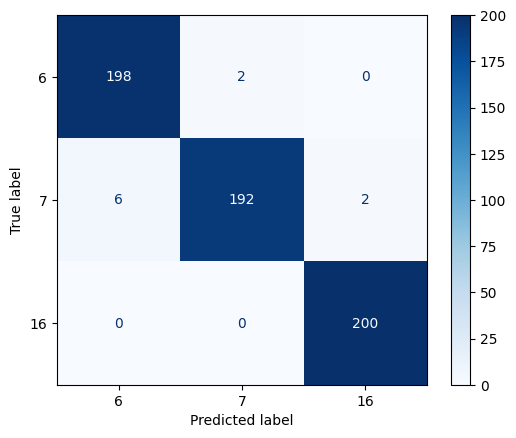

              precision    recall  f1-score   support

           6     0.9706    0.9900    0.9802       200
           7     0.9897    0.9600    0.9746       200
          16     0.9901    1.0000    0.9950       200

    accuracy                         0.9833       600
   macro avg     0.9835    0.9833    0.9833       600
weighted avg     0.9835    0.9833    0.9833       600



In [121]:
print("Logistic Regression BOW: ")
LogisticRegression_BOW = Model(LogisticRegression(max_iter=1000, random_state=42, C=100, class_weight=None, fit_intercept=True, l1_ratio=None, multi_class="auto", penalty="l2", solver="liblinear", warm_start=True), bow.X_bow_train, y_train.sdg)
print(LogisticRegression_BOW.fit_predict(bow.X_bow_train, y_train.sdg, bow.X_bow_test, y_test, False, True))

### Logistic Regression - TFIDF

Logistic Regression TFIDF: 


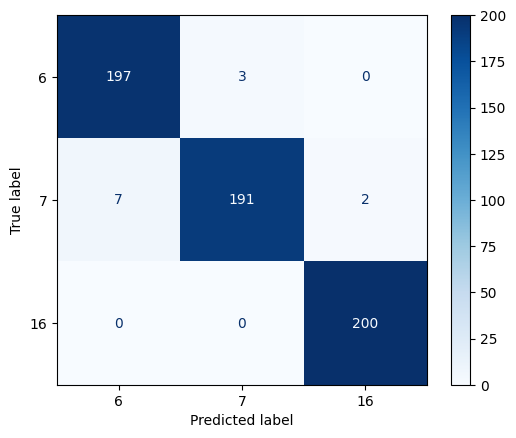

              precision    recall  f1-score   support

           6     0.9657    0.9850    0.9752       200
           7     0.9845    0.9550    0.9695       200
          16     0.9901    1.0000    0.9950       200

    accuracy                         0.9800       600
   macro avg     0.9801    0.9800    0.9799       600
weighted avg     0.9801    0.9800    0.9799       600



In [123]:
print("Logistic Regression TFIDF: ")
LogisticRegression_TFIDF = Model(LogisticRegression(max_iter=1000, random_state=42, C=100, fit_intercept=True, l1_ratio=None, multi_class="auto", penalty="l2", solver="newton-cg", warm_start=True), tfidf.X_tfidf_train, y_train.sdg)
print(LogisticRegression_TFIDF.fit_predict(tfidf.X_tfidf_train, y_train.sdg, tfidf.X_tfidf_test, y_test.sdg, False, True))

## 2. Random Forest Tree

### Random Forest Tree - BOW

Random Forest Classifier BOW: 


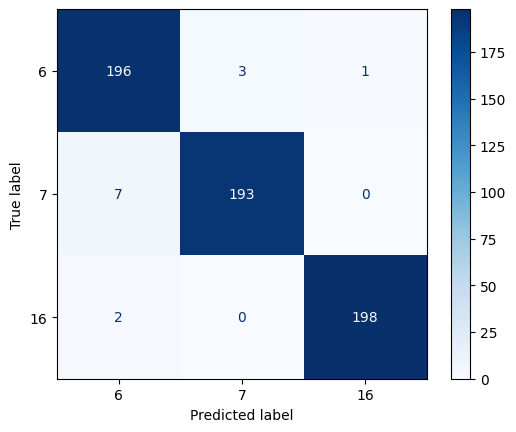

              precision    recall  f1-score   support

           6     0.9561    0.9800    0.9679       200
           7     0.9847    0.9650    0.9747       200
          16     0.9950    0.9900    0.9925       200

    accuracy                         0.9783       600
   macro avg     0.9786    0.9783    0.9784       600
weighted avg     0.9786    0.9783    0.9784       600



In [125]:
print("Random Forest Classifier BOW: ")
RandomForest_BOW = Model(RandomForestClassifier(random_state=42, bootstrap=False, criterion="gini", max_depth=None, max_features="log2", min_samples_leaf=1, min_samples_split=5, n_estimators=200), bow.X_bow_train, y_train.sdg)
print(RandomForest_BOW.fit_predict(bow.X_bow_train, y_train.sdg, bow.X_bow_test, y_test.sdg, False, True))

### Random Forest Tree - TFIDF

Random Forest Classifier TFIDF: 


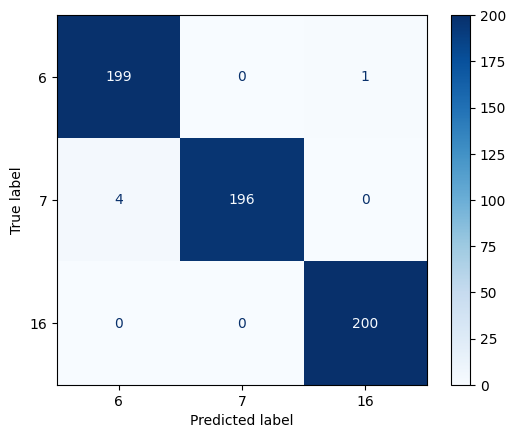

              precision    recall  f1-score   support

           6     0.9803    0.9950    0.9876       200
           7     1.0000    0.9800    0.9899       200
          16     0.9950    1.0000    0.9975       200

    accuracy                         0.9917       600
   macro avg     0.9918    0.9917    0.9917       600
weighted avg     0.9918    0.9917    0.9917       600



In [127]:
print("Random Forest Classifier TFIDF: ")
RandomForest_TFIDF = Model(RandomForestClassifier(random_state=42, bootstrap=False, criterion="gini", max_depth=None, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=200), tfidf.X_tfidf_train, y_train.sdg)
print(RandomForest_TFIDF.fit_predict(tfidf.X_tfidf_train, y_train.sdg, tfidf.X_tfidf_test, y_test.sdg, False, True))

## 3. C-Support Vector Classification

### C-Support Vector Classification - BOW

C-Support Vector Classification - TFIDF:


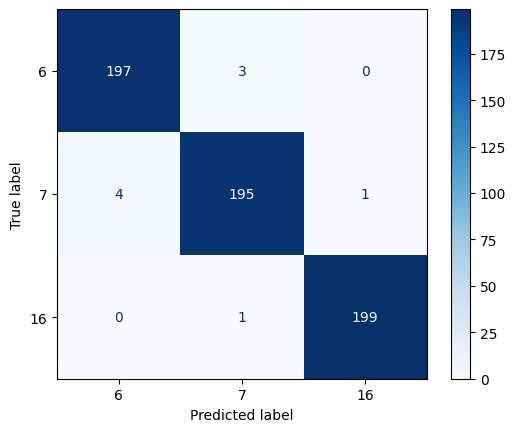

              precision    recall  f1-score   support

           6     0.9801    0.9850    0.9825       200
           7     0.9799    0.9750    0.9774       200
          16     0.9950    0.9950    0.9950       200

    accuracy                         0.9850       600
   macro avg     0.9850    0.9850    0.9850       600
weighted avg     0.9850    0.9850    0.9850       600



In [130]:
print("C-Support Vector Classification - TFIDF:")
SupportVectorMachine_BOW = Model(SVC(random_state=42, C=0.1, coef0=2, gamma=0.01, kernel="poly", shrinking=True, tol=0.001), bow.X_bow_train, y_train.sdg)
print(SupportVectorMachine_BOW.fit_predict(bow.X_bow_train, y_train.sdg, bow.X_bow_test, y_test.sdg, False, True))

### C-Support Vector Classification - TFIDF

C-Support Vector Classification - TFIDF: 


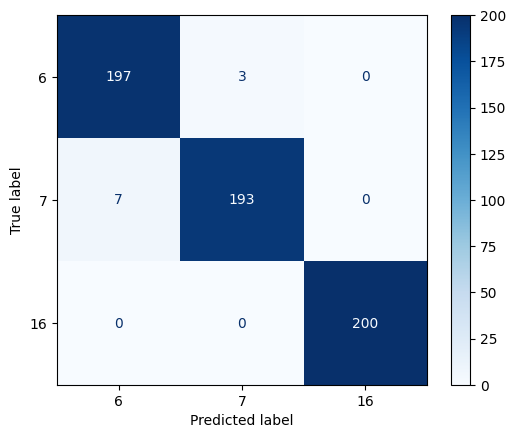

              precision    recall  f1-score   support

           6     0.9657    0.9850    0.9752       200
           7     0.9847    0.9650    0.9747       200
          16     1.0000    1.0000    1.0000       200

    accuracy                         0.9833       600
   macro avg     0.9835    0.9833    0.9833       600
weighted avg     0.9835    0.9833    0.9833       600



In [133]:
print("C-Support Vector Classification - TFIDF: ")
SupportVectorMachine_TFIDF = Model(SVC(random_state=42, C=1, coef0=2, gamma="scale", kernel="poly", shrinking=True, tol=0.001), tfidf.X_tfidf_train, y_train.sdg)
print(SupportVectorMachine_TFIDF.fit_predict(tfidf.X_tfidf_train, y_train.sdg, tfidf.X_tfidf_test, y_test.sdg, False, True))

## 4. Multinomial Naive Bayes

### Multinomial Naive Bayes - BOW

Multinomial Naive Bayes BOW: 


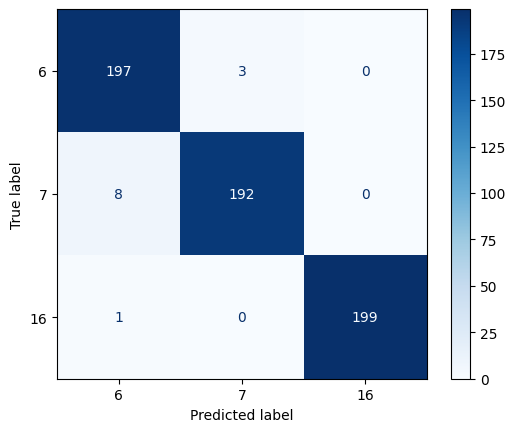

              precision    recall  f1-score   support

           6     0.9563    0.9850    0.9704       200
           7     0.9846    0.9600    0.9722       200
          16     1.0000    0.9950    0.9975       200

    accuracy                         0.9800       600
   macro avg     0.9803    0.9800    0.9800       600
weighted avg     0.9803    0.9800    0.9800       600



In [136]:
print("Multinomial Naive Bayes BOW: ")
MultinomialNaiveBayes_BOW = Model(MultinomialNB(alpha=0.3777063694539368, class_prior=None, fit_prior=True, force_alpha=True), bow.X_bow_train, y_train.sdg)
print(MultinomialNaiveBayes_BOW.fit_predict(bow.X_bow_train, y_train.sdg, bow.X_bow_test, y_test.sdg, False, True))

### Multinomial Naive Bayes - TFIDF

Multinomial Naive Bayes TFIDF: 


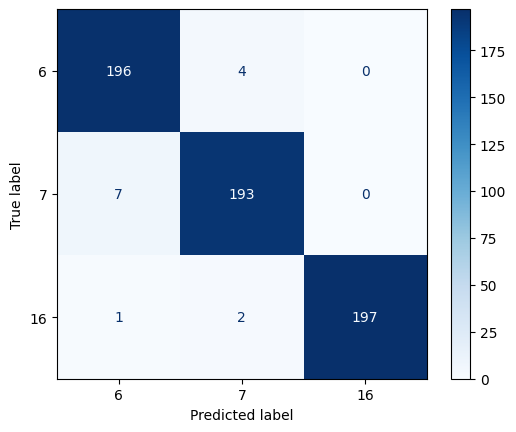

              precision    recall  f1-score   support

           6     0.9608    0.9800    0.9703       200
           7     0.9698    0.9650    0.9674       200
          16     1.0000    0.9850    0.9924       200

    accuracy                         0.9767       600
   macro avg     0.9769    0.9767    0.9767       600
weighted avg     0.9769    0.9767    0.9767       600



In [144]:
print("Multinomial Naive Bayes TFIDF: ")
MultinomialNaiveBayes_TFIDF = Model(MultinomialNB(alpha=51.21755443364241, class_prior=None, fit_prior=True, force_alpha=True), tfidf.X_tfidf_train, y_train.sdg)
print(MultinomialNaiveBayes_TFIDF.fit_predict(tfidf.X_tfidf_train, y_train.sdg, tfidf.X_tfidf_test, y_test.sdg, False, True))

# Summary of Models Quantitative Results (Validation - Test)

| Algorithm | Representation | F1 Score (Validation Set K-Fold C=5) | F1 Score (Test Set) | Difference Validation-Test |
|---------------|--------------------|------------------------------------------|-------------------------|-------------------------------|
| Logistic Regression | BOW | 98,45% | 98,33% | -0,12% |
| Logistic Regression | TF-IDF | 98,74% | 97,99% | -0,75% |
| Random Forest Tree | BOW | 98,70% | 97,84% | -0,86% |
| Random Forest Tree | TF-IDF | 98,41% | 99,17% | 0,76% |
| C-Support Vector Classification | BOW | 98,41% | 98,50% | 0,09% |
| C-Support Vector Classification | TF-IDF | 98,74% | 98,33% | -0,41% |
| Multinomial Naive Bayes | BOW | 98,54% | 98,00% | -0,54% |
| Multinomial Naive Bayes | TF-IDF | 98,54% | 97,67% | -0,87% |

# Pipeline Generation

## Logistic Regression - TFIDF

In [155]:
TFIDFLogisticRegressionPipeline = Pipeline([
    ('preprocessor', FunctionTransformer(DataProcessor("").process_data, validate=False)),
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, C=100, class_weight=None, fit_intercept=True, l1_ratio=None, multi_class="auto", penalty="l2", solver="liblinear", warm_start=True))
])

dump(TFIDFLogisticRegressionPipeline, '../models/TFIDFLogisticRegression/TFIDFLogisticRegression.pkl')

['../models/TFIDFLogisticRegression/TFIDFLogisticRegression.pkl']

## C-Support Vector Classification - TFIDF

In [156]:
TFIDFCSupportVectorPipeline = Pipeline([
    ('preprocessor', FunctionTransformer(DataProcessor("").process_data, validate=False)),
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC(random_state=42, C=1, coef0=2, gamma="scale", kernel="poly", shrinking=True, tol=0.001))
])

dump(TFIDFCSupportVectorPipeline, '../models/TFIDFCSupportVector/TFIDFCSupportVector.pkl')

['../models/TFIDFCSupportVector/TFIDFCSupportVector.pkl']

## Random Forest Tree - TFIDF

In [166]:
TFIDFRandomForestPipeline = Pipeline([
    ('preprocessor', FunctionTransformer(DataProcessor("").process_data, validate=False)),
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(random_state=42, bootstrap=False, criterion="gini", max_depth=None, max_features="log2", min_samples_leaf=1, min_samples_split=5, n_estimators=200))
])

dump(TFIDFRandomForestPipeline, '../models/TFIDFRandomForest/TFIDFRandomForest.pkl')

['../models/TFIDFRandomForest/TFIDFRandomForest.pkl']

# Prediction of Unlabeled Data with best finded Model

In [160]:
print("Reading Training raw Data")
X_train = pd.read_excel("../data/raw/cat_6716.xlsx").Textos_espanol
y_train = pd.read_excel("../data/raw/cat_6716.xlsx").sdg

print("Reading Unlabeled raw Data")
X_test = pd.read_excel("../data/raw/SinEtiquetatest_cat_6716.xlsx").Textos_espanol

print("Loading Pipeline")
loaded_pipeline = load('../models/TFIDFRandomForest/TFIDFRandomForest.pkl')

print("Fitting Pipeline with training data")
loaded_pipeline.fit(X_train, y_train)
print("Prediction Unlabeled data")
np.savetxt("data/predicted/SinEtiquetatest_cat_6716_clasificado.csv", loaded_pipeline.predict(X_test), delimiter=',', fmt='%s')
print("Predictions of unlabeled data saved in data/predicted/SinEtiquetatest_cat_6716_clasificado.csv")

Reading Training raw Data
Reading Unlabeled raw Data
Loading Pipeline
Fitting Pipeline with training data
Prediction Unlabeled data
Predictions of unlabeled data saved in data/predicted/SinEtiquetatest_cat_6716_clasificado.csv
